<a href="https://colab.research.google.com/github/FrancisDcruz/OpenFairness/blob/main/Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
from numpy import nan
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files
files.upload()    

Saving 2016-17_Co-Location_Reporting.csv to 2016-17_Co-Location_Reporting (5).csv


{'2016-17_Co-Location_Reporting.csv': b'DBN,District,School Name,Is Org Split-Sited,Building ID(s),Transfer School,Total Enrollment,Grades Pk-5 Enrollment,Grades 6-8 Enrollment,Grades 9-12 Enrollment,% Asian,% Black,% Hispanic,% Multiple Race Categories Not Represented,% White,% Swd,% Ell,% Poverty,ELA # Tested,ELA # Proficient (L3&4),ELA % Proficient (L3&4),Math # Tested,Math # Proficient (L3&4),Math % Proficient (L3&4),Total Grad Cohort,% 4-Year August Graduates,% 6-Year Graduates\n01M015,01,P.S. 015 Roberto Clemente,NO,M015,No,178,178,0,0,7.9%,28.7%,59.0%,2.2%,2.2%,27.0%,6.7%,100.0%,67,24,35.8%,69,31,44.9%,No Data,No Data,No Data\n01M019,01,P.S. 019 Asher Levy,NO,M019,No,271,271,0,0,8.9%,18.8%,66.4%,0.4%,5.5%,31.0%,3.3%,76.4%,87,45,51.7%,84,43,51.2%,No Data,No Data,No Data\n01M063,01,The STAR Academy - P.S.63,NO,M063,No,200,200,0,0,4.0%,18.5%,64.5%,2.5%,10.5%,34.5%,3.0%,83.5%,63,39,61.9%,65,28,43.1%,No Data,No Data,No Data\n01M064,01,P.S. 064 Robert Simon,NO,M064,No,247,247,0,0,5.3%

In [ ]:
data=pd.read_csv('/content/2016-17_Co-Location_Reporting.csv')

Counting the number of missing data in the dataset


In [ ]:
cols=data.columns
num_missing = (data[cols] == 'No Data').sum()
data=data[cols].replace('No Data',nan)
data=data[cols].replace('s',nan)
print(data.isnull().sum())
data=data.dropna()

DBN                                             0
District                                        0
School Name                                     0
Is Org Split-Sited                              0
Building ID(s)                                  0
Transfer School                                 0
Total Enrollment                                0
Grades Pk-5 Enrollment                          0
Grades 6-8 Enrollment                           0
Grades 9-12 Enrollment                          0
% Asian                                         0
% Black                                         0
% Hispanic                                      0
% Multiple Race Categories Not Represented      0
% White                                         0
% Swd                                           0
% Ell                                           0
% Poverty                                       0
ELA # Tested                                  434
ELA # Proficient (L3&4)                       434


Removing the % sign from all cells in the dataset

In [ ]:
columns=['% Asian', '% Black', '% Hispanic','% Multiple Race Categories Not Represented', '% White', '% Swd','% Ell', '% Poverty','ELA % Proficient (L3&4)',
         'Math % Proficient (L3&4)','% 4-Year August Graduates', '% 6-Year Graduates']
for cols in columns:
  data[cols]=data[cols].apply(lambda x: x.strip('%'))

Converting the data with numerical data into Float

In [ ]:
columns=['% Asian', '% Black', '% Hispanic','% Multiple Race Categories Not Represented', '% White', '% Swd','% Ell', '% Poverty', 'ELA # Tested', 'ELA # Proficient (L3&4)',
       'ELA % Proficient (L3&4)', 'Math # Tested', 'Math # Proficient (L3&4)','Math % Proficient (L3&4)', 'Total Grad Cohort','% 4-Year August Graduates', '% 6-Year Graduates']
for i in columns:
  data[i] = data[i].astype('float64')
#data[cols] = data[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [ ]:
data.dtypes

DBN                                            object
District                                        int64
School Name                                    object
Is Org Split-Sited                             object
Building ID(s)                                 object
Transfer School                                object
Total Enrollment                                int64
Grades Pk-5 Enrollment                          int64
Grades 6-8 Enrollment                           int64
Grades 9-12 Enrollment                          int64
% Asian                                       float64
% Black                                       float64
% Hispanic                                    float64
% Multiple Race Categories Not Represented    float64
% White                                       float64
% Swd                                         float64
% Ell                                         float64
% Poverty                                     float64
ELA # Tested                

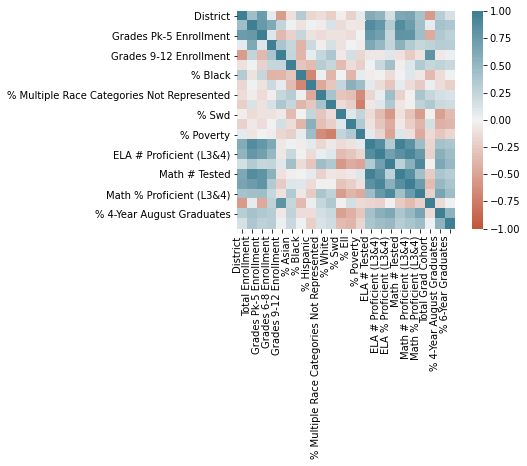

In [ ]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

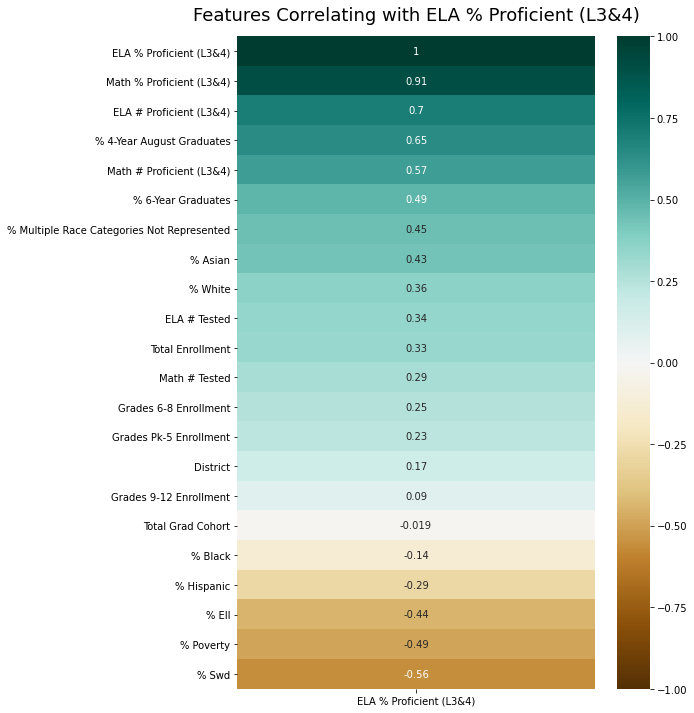

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['ELA % Proficient (L3&4)']].sort_values(by='ELA % Proficient (L3&4)', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with ELA % Proficient (L3&4)', fontdict={'fontsize':18}, pad=16);

In [ ]:
data['ELA % Proficient (L3&4)'].describe()

count    71.000000
mean     37.752113
std      19.566559
min       8.000000
25%      22.550000
50%      33.100000
75%      46.300000
max      95.700000
Name: ELA % Proficient (L3&4), dtype: float64

Since the mean of the ELA % PRoficient is 37. Therefore we selected 37 as the threshold for binary classification 

In [ ]:
one=data[(data['ELA % Proficient (L3&4)']>37)]
one.count()

DBN                                           32
District                                      32
School Name                                   32
Is Org Split-Sited                            32
Building ID(s)                                32
Transfer School                               32
Total Enrollment                              32
Grades Pk-5 Enrollment                        32
Grades 6-8 Enrollment                         32
Grades 9-12 Enrollment                        32
% Asian                                       32
% Black                                       32
% Hispanic                                    32
% Multiple Race Categories Not Represented    32
% White                                       32
% Swd                                         32
% Ell                                         32
% Poverty                                     32
ELA # Tested                                  32
ELA # Proficient (L3&4)                       32
ELA % Proficient (L3

In [ ]:
dropcol=['DBN','School Name','Building ID(s)','% Swd' , '% Poverty','Math % Proficient (L3&4)','Transfer School']
data=data.drop(dropcol,axis=1)

Encoding Categorical Variables

In [ ]:
categorical_cols = ['District','Is Org Split-Sited'] 
data=pd.get_dummies(data, columns=categorical_cols)

In [ ]:
data['Good(1)/Bad(0)'] = np.where(data['ELA % Proficient (L3&4)']>35, 1, 0)

In [ ]:
data['Good(1)/Bad(0)'].value_counts()

0    37
1    34
Name: Good(1)/Bad(0), dtype: int64

In [ ]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

Splitting of data


In [ ]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test, y_train=train_test_split(x,y, test_size=0.30,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Logistic 

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred= classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[21  4]
 [ 4 20]]


0.8367346938775511

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[23  2]
 [ 4 20]]


0.8775510204081632

SVM

In [ ]:
from sklearn.svm import SVC
classifier= SVC(kernel='linear', random_state= 0)
classifier.fit(x_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred= classifier.predict(x_test)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[19  6]
 [ 2 22]]


0.8367346938775511

Kernel SVM

In [ ]:
from sklearn.svm import SVC
classifier= SVC(kernel='rbf', random_state= 0)
classifier.fit(x_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred= classifier.predict(x_test)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[25  0]
 [ 5 19]]


0.8979591836734694

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred= classifier.predict(x_test)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[12 13]
 [ 1 23]]


0.7142857142857143

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred= classifier.predict(x_test)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[24  1]
 [ 4 20]]


0.8979591836734694